In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/marathon-time-predictions/MarathonData.csv


# 1. Definición del problema
Clarificar el objetivo del proyecto, qué problema se va a resolver y qué tipo de modelo se requiere (supervisado o no supervisado).

## Predicción de tiempos de en competiciones de marathon

Supongamos que una gran organización deportiva está interesada en desarrollar un modelo de predicción para estimar los tiempos de finalización de corredores en maratones. Utilizarían el modelo para predecir los tiempos de miles de corredores antes del evento, con el fin de planificar de manera más eficiente los tiempos de cierre de las calles, la cantidad de voluntarios necesarios, las zonas de hidratación, y otros aspectos logísticos del evento.

Este modelo también puede ser utilizado por entrenadores y corredores para predecir su rendimiento futuro y ajustar su entrenamiento. Un corredor puede introducir variables como su tiempo en carreras anteriores, su edad, sexo, y nivel de entrenamiento para obtener una predicción del tiempo que probablemente logrará en el próximo evento.

# 2. Recolección de los datos

Recopilar datos relevantes y suficientes para entrenar el modelo. Estos datos pueden ser estructurados o no estructurados.

In [2]:
df_marathon_ = pd.read_csv('/kaggle/input/marathon-time-predictions/MarathonData.csv')

In [3]:
df_marathon_.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


## Contenidos del dataset
### id:
simple counter

### Marathon:
the Marathon name where the data were extracted. I use the data coming out from Strava "Side by side comparison" and the data coming from the final marathon result

### Name:
The athlete's name, still some problems with UTF-8, I'll fix that soon

### Category:
the sex and age group of a runner

MAM Male Athletes under 40 years
WAM Women under 40 Years
M40 Male Athletes between 40 and 45 years
### km4week
This is the total number of kilometers run in the last 4 weeks before the marathon, marathon included. If, for example, the km4week is 100, the athlete has run 400 km in the four weeks before the marathon

### sp4week
This is the average speed of the athlete in the last 4 training weeks. The average counts all the kilometers done, included the slow kilometers done before and after the training. A typic running session can be of 2km of slow running, then 12-14km of fast running, and finally other 2km of slow running. The average of the speed is this number, and with time this is one of the numbers that has to be refined

### cross training:
If the runner is also a cyclist, or a triathlete, does it counts? Use this parameter to see if the athlete is also a cross trainer in other disciplines

### Wall21:
In decimal. The tricky field. To acknowledge a good performance, as a marathoner, I have to run the first half marathon with the same split of the second half. If, for example, I run the first half marathon in 1h30m, I must finish the marathon in 3h (for doing a good job). If I finish in 3h20m, I started too fast and I hit "the wall". My training history is, therefore, less valid, since I was not estimating my result

### Marathon time:
In decimal. This is the final result. Based on my training history, I must predict my expected Marathon time

### Category:
This is an ancillary field. It gives some direction, so feel free to use or discard it. It groups in:

A results under 3h
B results between 3h and 3h20m
C results between 3h20m and 3h40m
D results between 3h40 and 4h

# 3. Análisis exploratorio de datos (EDA)
Entender las características principales de un conjunto de datos mediante técnicas estadísticas y visualizaciones, con el objetivo de descubrir patrones, detectar anomalías, probar hipótesis y verificar supuestos.

In [4]:
df_marathon_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [5]:
# La columna 'Wall21' viene en formato texto

df_marathon_['Wall21'] = pd.to_numeric(df_marathon_['Wall21'],errors='coerce')

In [6]:
df_marathon_.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'km4week'}>],
       [<Axes: title={'center': 'sp4week'}>,
        <Axes: title={'center': 'Wall21'}>],
       [<Axes: title={'center': 'MarathonTime'}>, <Axes: >]], dtype=object)

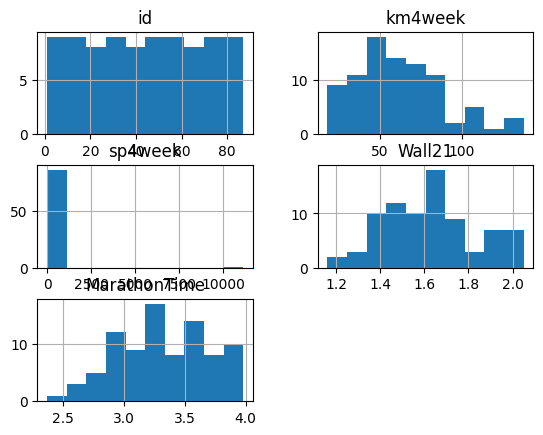

In [7]:
# Investigamos algo las características

# Correlación entre características

df_marathon_.hist()

In [8]:
df_marathon_.columns

Index(['id', 'Marathon', 'Name', 'Category', 'km4week', 'sp4week',
       'CrossTraining', 'Wall21', 'MarathonTime', 'CATEGORY'],
      dtype='object')

In [9]:
# Investigamos algo las características

# Correlación entre características

df_marathon_[['km4week', 'sp4week','Wall21', 'MarathonTime']].corr()

,km4week,sp4week,Wall21,MarathonTime
km4week,1.000000,-0.107429,-0.580228,-0.606782
sp4week,-0.107429,1.000000,0.223548,0.172294
Wall21,-0.580228,0.223548,1.000000,0.969089
MarathonTime,-0.606782,0.172294,0.969089,1.000000


# 4. Preprocesamiento de datos
Limpiar, normalizar y transformar los datos para prepararlos para el modelo. Incluye la gestión de valores faltantes y la codificación de variables.

In [10]:
# Nos quedamos con las características intresantes

df_marathon = df_marathon_[['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21', 'MarathonTime']]

In [11]:
# Datos faltantes

df_marathon.isnull().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [12]:
# Primero vamos a tratar una variable categórica

df_marathon['CrossTraining'].unique()

array([nan, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 5h',
       'ciclista 3h'], dtype=object)

In [13]:
# Primero relleno con ceros este campo para los valores nulos

df_marathon["CrossTraining"] = df_marathon['CrossTraining'].fillna(0)

In [14]:
#  Creamos un diccionario de reemplazo

dict_crosstraining = {'ciclista 1h': 1, 'ciclista 3h': 2, 'ciclista 4h': 3, 'ciclista 5h': 4, 'ciclista 13h': 5}

In [15]:
# Reemplazamos los valores de texto por los numéricos

df_marathon['CrossTraining'] = df_marathon['CrossTraining'].replace(dict_crosstraining) 

In [16]:
df_marathon['CrossTraining'].unique()

array([0, 1, 3, 5, 4, 2])

In [17]:
# Hacemos lo mismo para la columna categoría

df_marathon["Category"] = df_marathon['Category'].fillna(0)

print('Valores anteriores:', df_marathon['Category'].unique())

dict_category = {'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5,'WAM':6}

df_marathon['Category'] = df_marathon['Category'].replace(dict_category)

print('Valores tras codificación:', df_marathon['Category'].unique())

Valores anteriores: ['MAM' 'M45' 'M40' 'M50' 'M55' 0 'WAM']
Valores tras codificación: [1 2 3 4 5 0 6]


In [18]:
# Volvemos a explorar las características antes del entrenamiento

df_marathon.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74


In [19]:
df_marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       87 non-null     int64  
 1   km4week        87 non-null     float64
 2   sp4week        87 non-null     float64
 3   CrossTraining  87 non-null     int64  
 4   Wall21         81 non-null     float64
 5   MarathonTime   87 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 4.2 KB


In [20]:
#  Prescindimos de aquellos registros que tienen Null en la columna 'Wall21'

df_marathon.dropna(inplace=True)

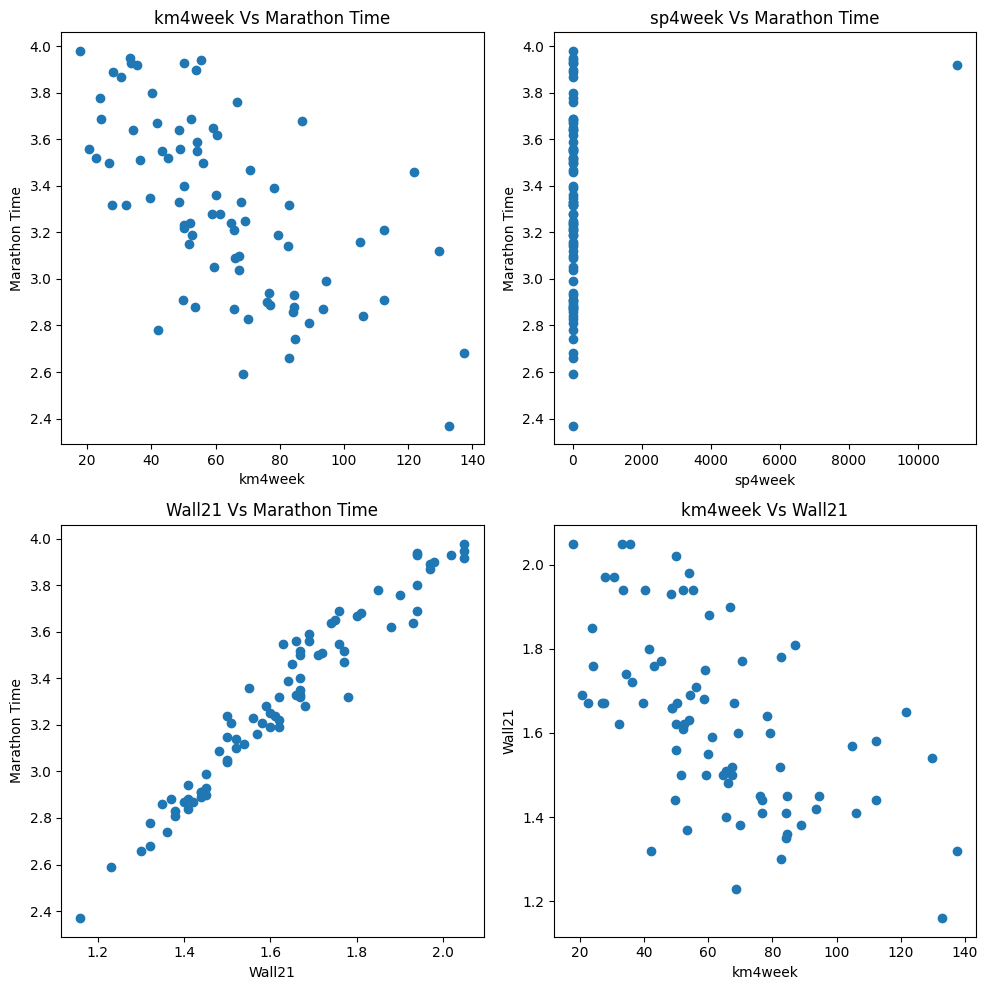

In [21]:
# Visualizamos de nuevo relaciones entre caracteristicas

import matplotlib.pyplot as plt

# Crear una figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Primer gráfico: km4week vs MarathonTime
axs[0, 0].scatter(df_marathon['km4week'], df_marathon['MarathonTime'])
axs[0, 0].set_title('km4week Vs Marathon Time')
axs[0, 0].set_xlabel('km4week')
axs[0, 0].set_ylabel('Marathon Time')

# Segundo gráfico: sp4week vs MarathonTime
axs[0, 1].scatter(df_marathon['sp4week'], df_marathon['MarathonTime'])
axs[0, 1].set_title('sp4week Vs Marathon Time')
axs[0, 1].set_xlabel('sp4week')
axs[0, 1].set_ylabel('Marathon Time')

# Tercer gráfico: Wall21 vs MarathonTime
axs[1, 0].scatter(df_marathon['Wall21'], df_marathon['MarathonTime'])
axs[1, 0].set_title('Wall21 Vs Marathon Time')
axs[1, 0].set_xlabel('Wall21')
axs[1, 0].set_ylabel('Marathon Time')

# Cuarto gráfico: km4week vs Wall21
axs[1, 1].scatter(df_marathon['km4week'], df_marathon['Wall21'])
axs[1, 1].set_title('km4week Vs Wall21')
axs[1, 1].set_xlabel('km4week')
axs[1, 1].set_ylabel('Wall21')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [22]:
# Identificamos un outlier en sp4Week. Vamos a eliminarlo

In [23]:
df_marathon = df_marathon.query('sp4week<1000')

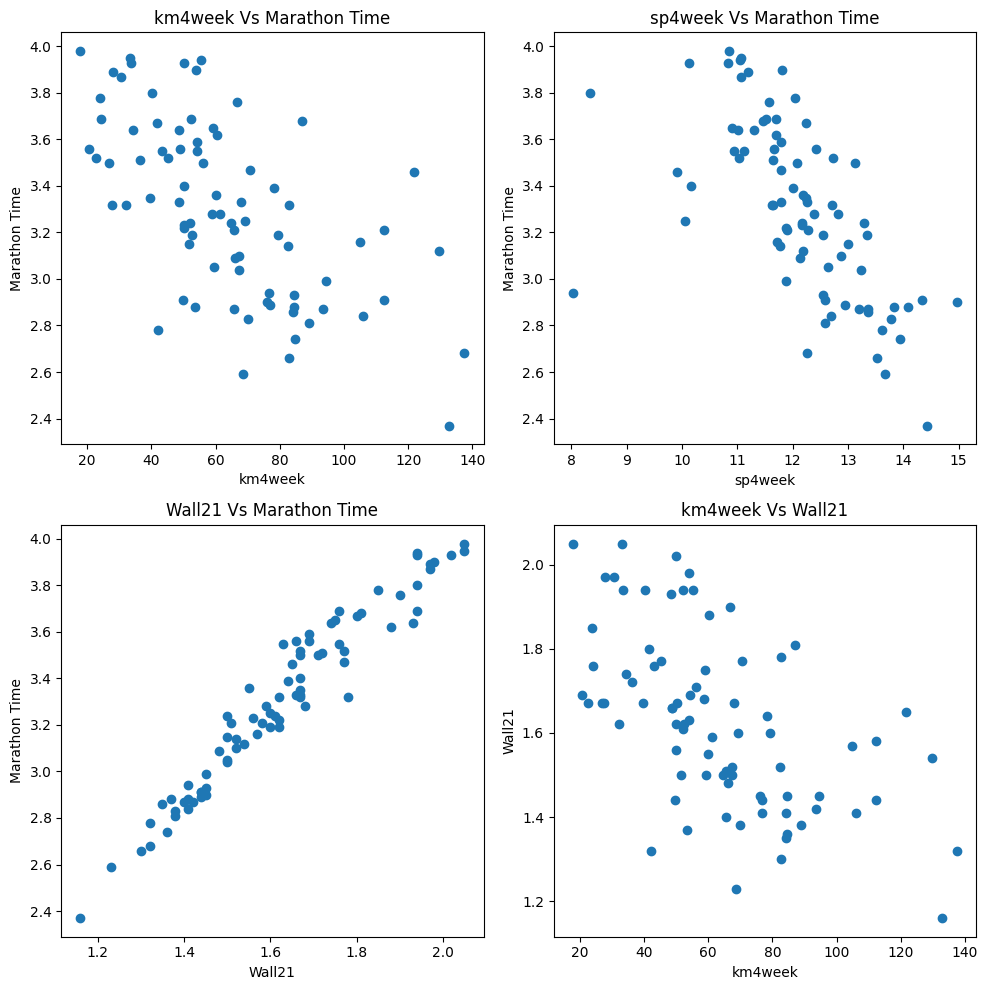

In [24]:
# Visualizamos de nuevo relaciones entre caracteristicas

import matplotlib.pyplot as plt

# Crear una figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Primer gráfico: km4week vs MarathonTime
axs[0, 0].scatter(df_marathon['km4week'], df_marathon['MarathonTime'])
axs[0, 0].set_title('km4week Vs Marathon Time')
axs[0, 0].set_xlabel('km4week')
axs[0, 0].set_ylabel('Marathon Time')

# Segundo gráfico: sp4week vs MarathonTime
axs[0, 1].scatter(df_marathon['sp4week'], df_marathon['MarathonTime'])
axs[0, 1].set_title('sp4week Vs Marathon Time')
axs[0, 1].set_xlabel('sp4week')
axs[0, 1].set_ylabel('Marathon Time')

# Tercer gráfico: Wall21 vs MarathonTime
axs[1, 0].scatter(df_marathon['Wall21'], df_marathon['MarathonTime'])
axs[1, 0].set_title('Wall21 Vs Marathon Time')
axs[1, 0].set_xlabel('Wall21')
axs[1, 0].set_ylabel('Marathon Time')

# Cuarto gráfico: km4week vs Wall21
axs[1, 1].scatter(df_marathon['km4week'], df_marathon['Wall21'])
axs[1, 1].set_title('km4week Vs Wall21')
axs[1, 1].set_xlabel('km4week')
axs[1, 1].set_ylabel('Wall21')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# 5. Elección del modelo

Vamos a elegir, por las características del problema, inicialmente un modelo de regresión lineal para ver el rendimiento base.

# 6. Entrenamiento del modelo
Utilizar los datos de entrenamiento para ajustar los parámetros del modelo.

In [25]:
#  Primero vamos a separar el dataset en dos conjuntos: entrenamiento y validación (training y test)

df_training = df_marathon.sample(frac=0.8,random_state=42)
df_test = df_marathon.drop(df_training.index)

In [26]:
df_training.columns

Index(['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21',
       'MarathonTime'],
      dtype='object')

In [27]:
# Separamos target de características

X_train = df_training[['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21']]
X_test = df_test[['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21']]

y_train = df_training[['MarathonTime']]
y_test = df_test[['MarathonTime']]


In [28]:
# Ahora seleccionamos el modelo adecuado. Pero lo haremos valiéndonos de la biblioteca SciKitLearn

from sklearn.linear_model import LinearRegression

modelo = LinearRegression()


In [29]:
#  Entrenamos el modelo

modelo.fit(X_train,y_train)

LinearRegression()

# 7. Validación
Evaluar el rendimiento del modelo en datos de validación para evitar sobreajuste y optimizar hiperparámetros.

In [30]:
# Vamos a calcular las predicciones del modelo con el conjunto de test

y_predict = modelo.predict(X_test)
y_predict

array([[2.64571708],
       [2.73559247],
       [2.97554973],
       [2.9985415 ],
       [3.06251058],
       [3.0746248 ],
       [3.28911915],
       [3.3023089 ],
       [3.39364393],
       [3.44392736],
       [3.43862272],
       [3.41787094],
       [3.54785885],
       [3.73307934],
       [3.92137535],
       [3.86593134]])

In [31]:
# Comparamos con el valor real aplicando métrica de error cuadrático medio

from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y_test, y_predict))

print("Error porcentual : %f" % (error*100))

Error porcentual : 8.420149


In [32]:
# Ahora hay que preguntarse si es posible mejorar el resultado tocando hiperparámetros

# 8 Evaluación

Probar el modelo con datos de prueba para medir su capacidad de generalización.

In [33]:
# Vamos a hacer una predicción para un conjunto de valores concreto

nuevo_corredor = pd.DataFrame(np.array([[1,400,20,0,1.4]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


In [34]:
y = modelo.predict(nuevo_corredor)

print('Tiempo estimado para el corredor: %f horas' % y[0])

Tiempo estimado para el corredor: 2.196957 horas


# 8 Despliegue (MLOps)

Implementar el modelo en un entorno de producción para hacer predicciones o automatizar decisiones.